# Imports

In [1]:
!pwd
import sys
sys.path.append("..")
from bumps.names import Curve, fit, FitProblem
from bumps.dream.state import load_state
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft as fft
import molgroups as mol
import os


/Users/frank/Dropbox/My Mac (PN115993.campus.nist.gov)/Documents/programming/molgroups/examples/information_theory/simulate_data/garefl


# Create Short Example Fit

In [2]:
#!refl1d run.py --fit=dream --store=T --init=lhs --parallel --burn=4 --steps=4 --overwrite

# Variables

In [3]:
store = "T"
setupdir = os.getcwd()
runfile = "run"
fitsource = "garefl"

# Fit Setup

In [4]:
import rs
import os

molstat = rs.CMolStat(
    fitsource=fitsource,
    spath=setupdir,
    mcmcpath=store,
    runfile=runfile,
    state=None,
    problem=None,
)

In [5]:
molstat.fnSimulateData()

Found T/run.par 

Loading MCMC best-fit parameters ...
d_oxide 27.1385608994351
d_Cr 12.0045081882702
d_gold 140.085054050314
l_tether 6.15699252838842
l_lipid1 14.3227020845953
l_lipid2 10.4945223924891
dl_lipid_gcrinse1 0.125269558010402
nf_tether 0.914453587700949
mult_tether 1.15817117378898
vf_bilayer 0.999771193924136
vf_bilayer_gcrinse1 0.999112772552033
fraction_rinse2 0.963889796755209
dp_on0 -5.08018692755215
dp_on1 -3.0411460131031
dp_on2 -0.795635069335647
dp_on3 -4.21815619677066
dp_on4 -5.39244018573827
dp_on5 2.07165524339043
dp_on6 -3.65269205349576
dp_on7 5.20460893426816
dp_on8 3.05367888205943
vf_on1 -0.0003880324387213
vf_on2 0.0243012193412938
vf_on3 0.0392613731348821
vf_on4 0.0027652806650946
vf_on5 0.0771453818074722
vf_on6 0.057724000404784
vf_on7 0.0134049690450054
frac2_on0 0.994131099540302
frac2_on1 0.131595733681778
frac2_on2 0.198736670207635
frac2_on3 0.462629684267791
frac2_on4 0.209619582294796
frac2_on5 0.119254915599886
frac2_on6 0.0251001206065209
f

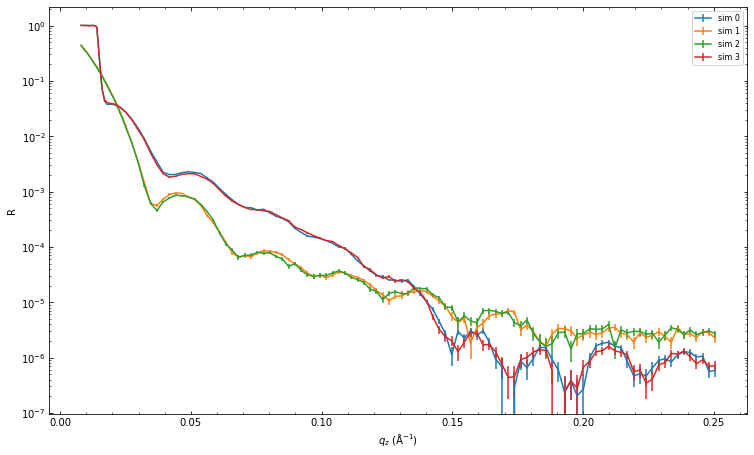

In [6]:
import pandas

fig, ax = plt.subplots()

i = 0
while os.path.isfile('sim' + str(i) + '.dat'):
    simdata = pandas.read_csv('sim' + str(i) + '.dat', sep=' ', skip_blank_lines=True,comment='#')
    ax.errorbar(simdata['Q'], simdata['R'], simdata['dR'], label="sim " + str(i))
    i += 1

ax.legend(fontsize=8)
ax.set_ylabel("R", fontsize=10)
ax.set_yscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q_z$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()
